### Authors:

Marek Szydłowski 136633<br>
Wojciech Tomczak 145467

Link to the source code: https://github.com/Vosloo/evolutionary-computation-labs

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd

from multiprocessing import Pool
import pickle

from IPython.display import display, Markdown

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.algorithms.methods import Method
from src.visualization import Visualizer

In [4]:
problem = TSPProblem(no_runs=200)


Loaded 4 instances: TSPA, TSPB, TSPC, TSPD
Available methods: ['RANDOM', 'NEAREST', 'GREEDY_CYCLE', 'GREEDY_REGRET', 'GREEDY_REGRET_WEIGHTED', 'LOCAL_SEARCH_STEEPEST_NODES_RANDOM', 'LOCAL_SEARCH_STEEPEST_NODES_HEURISTIC', 'LOCAL_SEARCH_STEEPEST_EDGES_RANDOM', 'LOCAL_SEARCH_STEEPEST_EDGES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_NODES_RANDOM', 'LOCAL_SEARCH_GREEDY_NODES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_EDGES_RANDOM', 'LOCAL_SEARCH_GREEDY_EDGES_HEURISTIC', 'LOCAL_SEARCH_CANDIDATES_RANDOM', 'LOCAL_SEARCH_CANDIDATES_HEURISTIC', 'LOCAL_SEARCH_MOVES_RANDOM']


In [5]:
grades = problem.run(
    ["TSPC", "TSPD"],
    [
        Method.RANDOM,
        Method.LOCAL_SEARCH_MOVES_RANDOM,
    ],
)



Running TSPC instance
Running RANDOM method for 200 runs
Finished RANDOM method in 0.27s
Running LOCAL_SEARCH_MOVES_RANDOM method for 200 runs
Finished LOCAL_SEARCH_MOVES_RANDOM method in 139.74s

Running TSPD instance
Running RANDOM method for 200 runs
Finished RANDOM method in 0.20s
Running LOCAL_SEARCH_MOVES_RANDOM method for 200 runs
Finished LOCAL_SEARCH_MOVES_RANDOM method in 132.49s


In [6]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        print(f"{meth_name}: {grade}")


TSPC:
----
Random: 
==================================== Grade =====================================
Method:                                 Random
Best run id:                            186
Best run cost:                          47041
Best run distance:                      143027
Best run score:                         190068
Min score:                              190068
Avg score:                              215115
Max score:                              238237

Local Search Moves Random: 
==================================== Grade =====================================
Method:                                 Local Search Moves Random
Best run id:                            186
Best run cost:                          37977
Best run distance:                      25591
Best run score:                         63568
Min score:                              63568
Avg score:                              63568
Max score:                              63568


TSPD:
----
Random: 
========

In [7]:
nodes = {
    instance_name: problem._get_nodes(instance)
    for instance_name, instance in problem.instances.items()
    if instance_name in ("TSPC", "TSPD")
}
visualizer = Visualizer(nodes)


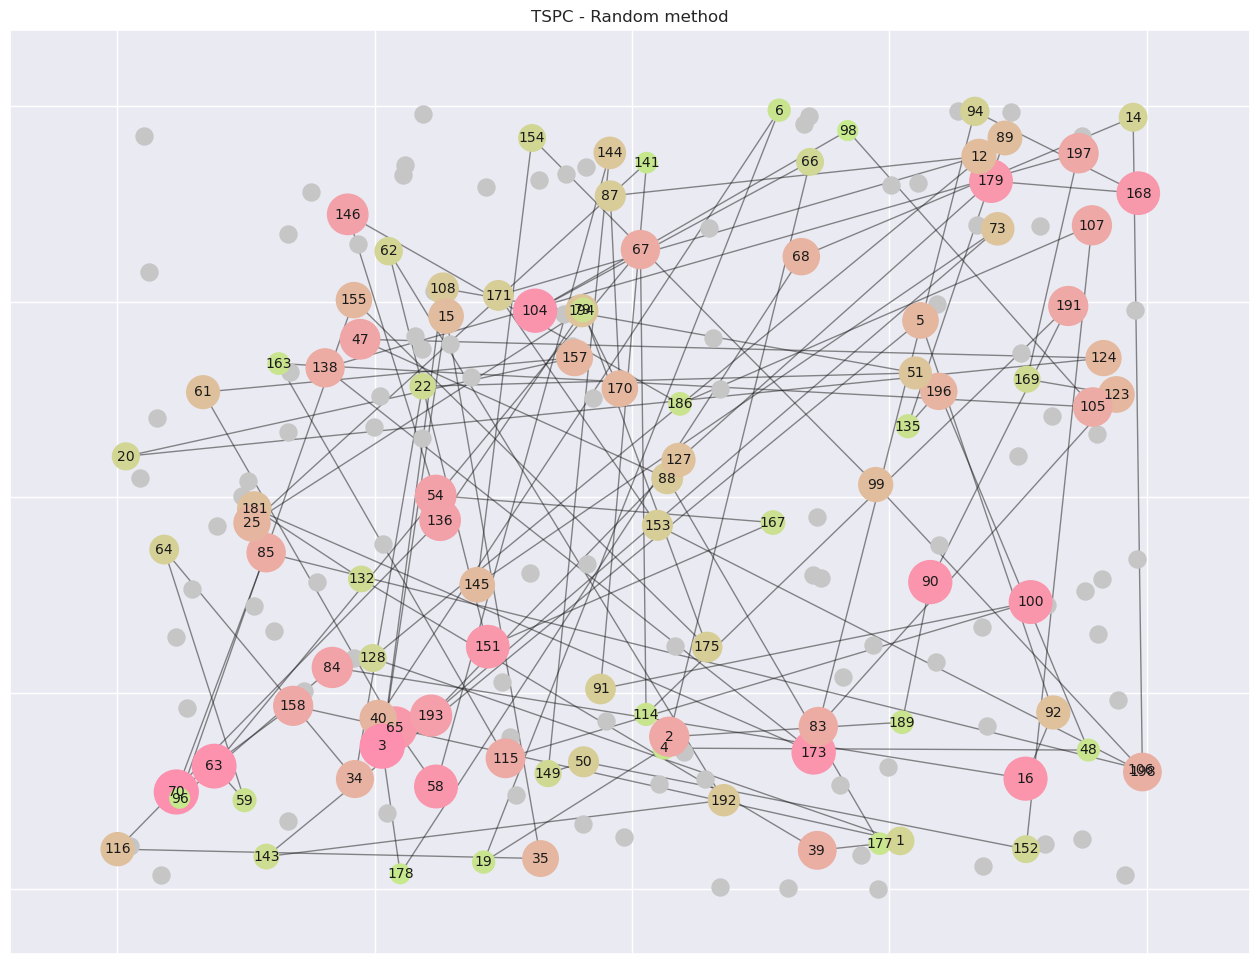

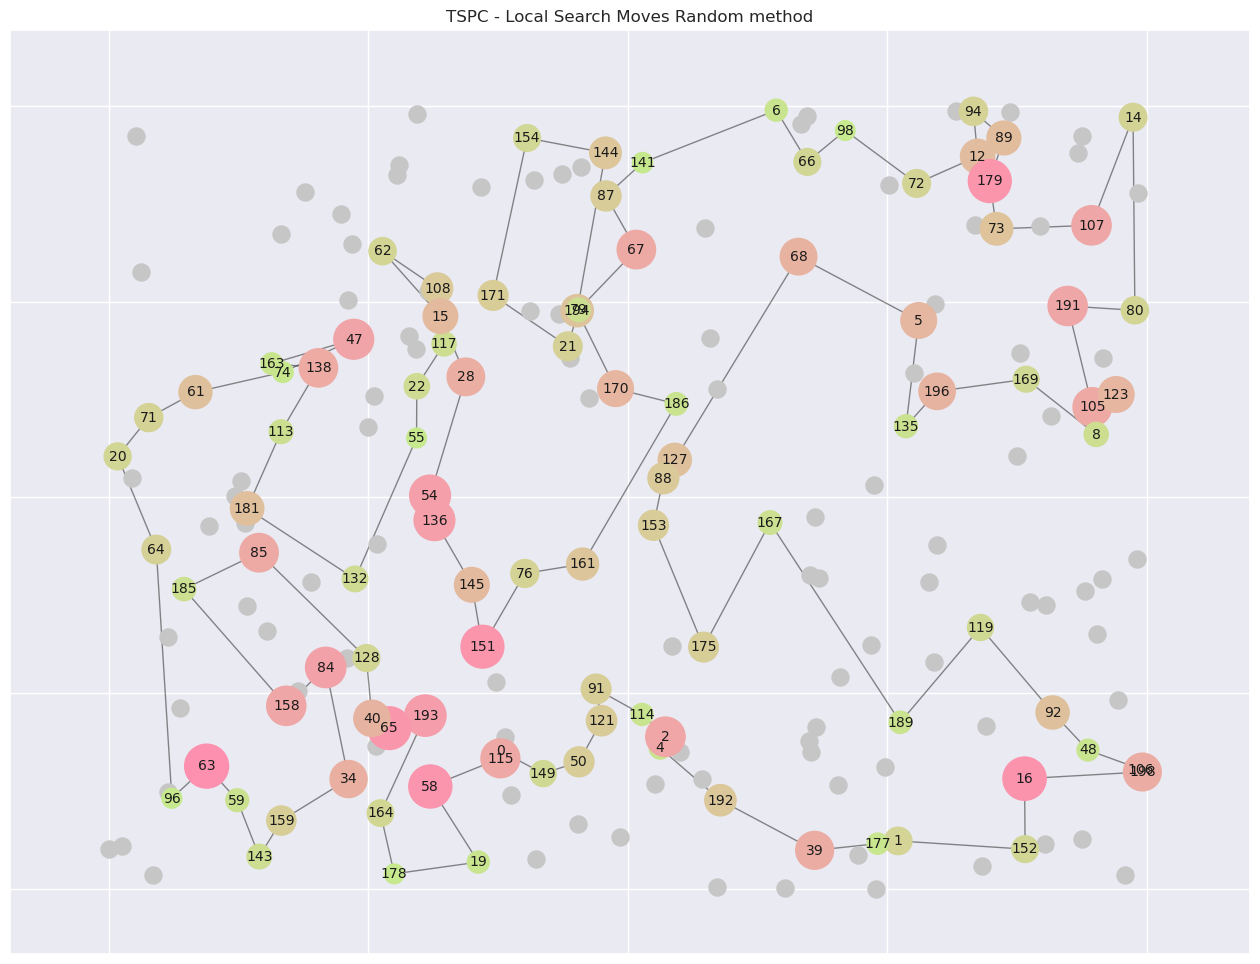

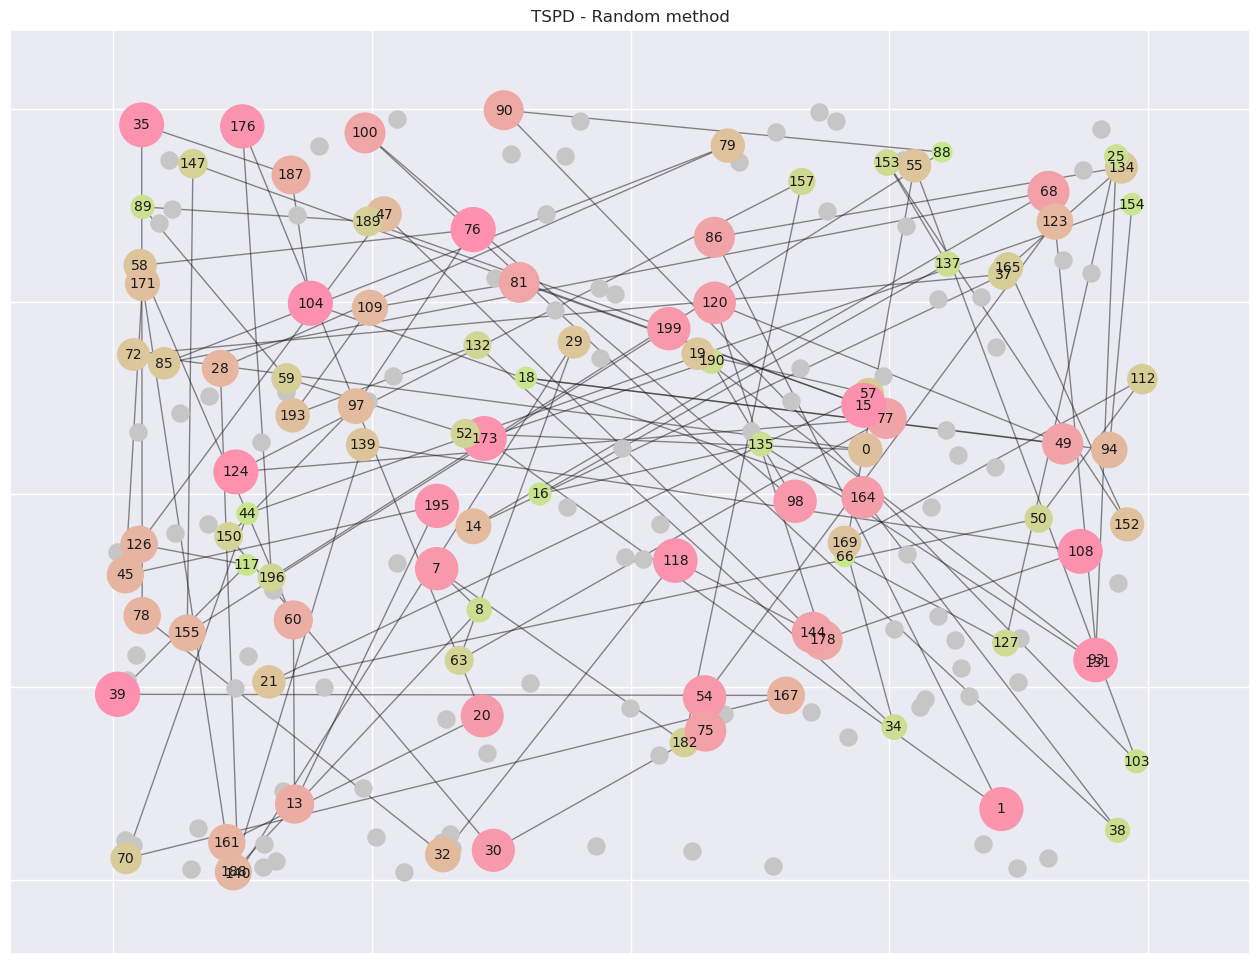

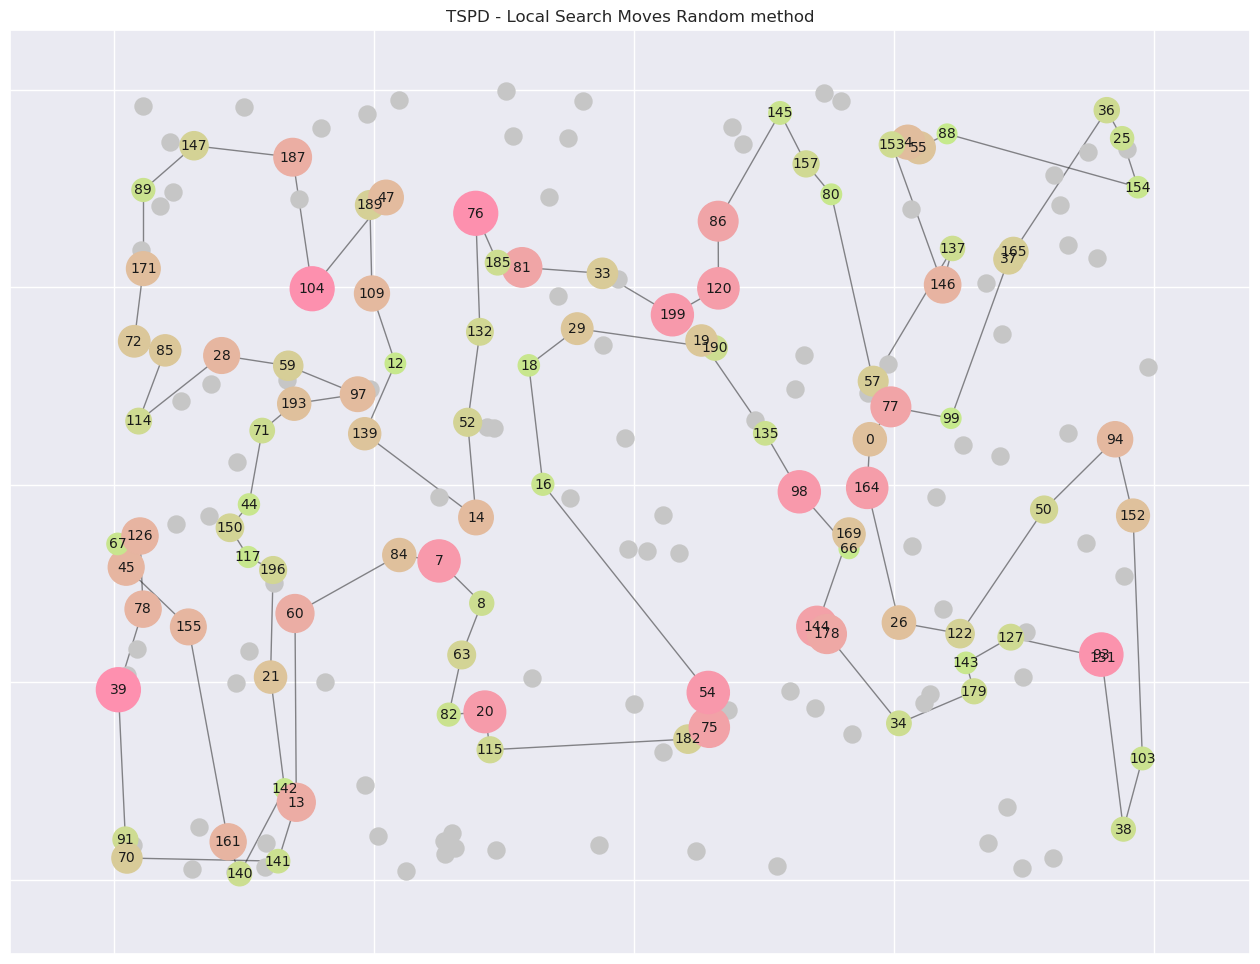

In [8]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)

In [9]:
old_grades = pickle.load(open("../lab-4/grades.pkl", "rb"))


In [10]:
merged_grades = {"TSPC": {}, "TSPD": {}}
merged_grades["TSPC"] = old_grades["TSPC"] | grades["TSPC"]
merged_grades["TSPD"] = old_grades["TSPD"] | grades["TSPD"]

In [11]:
res = {}
for instance_name, instance_grades in merged_grades.items():
    res[instance_name] = {}
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        res[instance_name][meth_name] = [grade.avg, grade.min, grade.max, *grade.runtime]

In [12]:
dfs = {}
for instance, methods in res.items():
    df = (
        pd.DataFrame.from_dict(
            methods, orient="index", columns=["Average Score", "Min Score", "Max Score", "Total runtime", "Per run runtime"]
        )
        .reset_index()
        .sort_values(by="Min Score")
        .reset_index(drop=True)
    )
    df.columns = ["Method", "Average Score", "Min Score", "Max Score", "Total runtime", "Per run runtime"]
    df.index.name = instance
    dfs[instance] = df

In [13]:
for df in dfs.values():
    display(Markdown(df.to_markdown()))

|   TSPC | Method                            |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:----------------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Candidates Random    |           52704 |       52704 |       52704 |        114.266  |            0.5713 |
|      1 | Local Search Candidates Heuristic |           53867 |       53867 |       53867 |          3.8769 |            0.0194 |
|      2 | Greedy Regret Weighted            |           55930 |       54126 |       58342 |         83.3534 |            0.4168 |
|      3 | Local Search Moves Random         |           63568 |       63568 |       63568 |        139.737  |            0.6987 |
|      4 | Random                            |          215115 |      190068 |      238237 |          0.2708 |            0.0014 |

|   TSPD | Method                            |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:----------------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Candidates Random    |           48478 |       48478 |       48478 |        128.027  |            0.6401 |
|      1 | Local Search Candidates Heuristic |           48690 |       48690 |       48690 |          7.0193 |            0.0351 |
|      2 | Greedy Regret Weighted            |           53783 |       49165 |       59081 |         82.686  |            0.4134 |
|      3 | Local Search Moves Random         |           63474 |       63474 |       63474 |        132.493  |            0.6625 |
|      4 | Random                            |          219284 |      195580 |      240463 |          0.2044 |            0.001  |